In [80]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from models import Dim
from datasets import fifa
import matplotlib.pyplot as plt
from math import floor
import numpy as np

In [3]:
# Instantiate dim. red. framework
dim = Dim()

# Load dataset
fifa = fifa()

X_train, X_test, y_train, y_test = train_test_split(fifa.X, fifa.y, test_size=0.1, random_state=33)
dim.col_names = fifa.col_names
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

dim.new_dim = dict()

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
# Obtain reduced space
dim.apply_dim(num_dim=[1, 2, 3, 4, 5], tflag=[3, 7, 8])

('5Dim', 'LLE', 'k=81-reg=0.001'): 100%|██████████| 5/5 [07:44<00:00, 92.85s/it]       


Pickled at 02-11-12:42


In [4]:
# Apply classifiers
scores = dim.apply_clf()
scores.head(5)

AdaBoost: 100%|██████████| 45/45 [20:56<00:00, 27.93s/it]


saved as 02-11-15:04(.csv)(.xlsx)


,Model,Accuracy,Params,MAE,Dimensions,Dim. Technique,Dim. Params
35,XGBoost,0.943836,{'xgb__n_estimators': 5},0.083562,4Dim,LLE,k=81-reg=0.001
44,XGBoost,0.942466,{'xgb__n_estimators': 20},0.090411,5Dim,LLE,k=81-reg=0.001
224,Random Forest,0.942466,"{'rf__max_depth': None, 'rf__n_estimators': 200}",0.090411,5Dim,LLE,k=81-reg=0.001
134,Decision Tree,0.941096,{'dt__max_depth': 5},0.091781,5Dim,LLE,k=81-reg=0.001
125,Decision Tree,0.941096,{'dt__max_depth': 5},0.090411,4Dim,LLE,k=81-reg=0.001


In [4]:
# Unplickle dim
dim.unpickle_dim('dim/02-11-12:42.pkl')

# Read scores
scores = pd.read_csv('scores/07-04-20:42.csv')
# Filter for the best configuration
best_sc = scores.loc[scores.sort_values('Dimensions').groupby('Dim. Technique')['Accuracy'].idxmax()]
# Transform rows to dictionary keys
best_sc = [tuple(row) for row in best_sc[['Dimensions', 'Dim. Technique', 'Dim. Params']].to_records(index=False)]
best_sc

[('3Dim', 'KPCA', 'Linear'),
 ('5Dim', 'LLE', 'k=30-reg=0.001'),
 ('5Dim', 'LOL', nan),
 ('4Dim', 'LPP', 'k=5'),
 ('3Dim', 'PCA', nan),
 ('2Dim', 'SLMVP', 'Radial-Gammas=0.1')]

In [5]:
best_sc = [('3Dim', 'KPCA', 'Linear'),
 ('5Dim', 'LLE', 'k=81-reg=0.001'),
 ('5Dim', 'LOL', ''),
 ('4Dim', 'LPP', 'k=5'),
 ('3Dim', 'PCA', ''),
 ('2Dim', 'SLMVP', 'Radial-Gammas=0.1')]

newdict = {k: dim.new_dim[k] for k in best_sc}
dim.new_dim = newdict

# Get the variability 
weights = dim.get_weights().droplevel(3, axis=1)
weights

3Dim           5Dim                4Dim      3Dim              2Dim
       KPCA            LLE       LOL       LPP       PCA             SLMVP
     Linear k=81-reg=0.001                 k=5           Radial-Gammas=0.1
0  0.553326            0.2  0.748348  0.004166  0.553326               0.5
1  0.314482            0.2  0.251534  0.323981  0.314482               0.5
2  0.132192            0.2  0.000047  0.330423  0.132192                  
3                      0.2  0.000040  0.341429                            
4                      0.2  0.000031

In [15]:
weigts_c = []
for key in dim.new_dim.keys():
    if weigts_c != '':
        weigts_c = weigts_c + weights[key].tolist()
weigts_c = [x for x in weigts_c if x != '']
weigts_c

[0.5533261320273498,
 0.3144821232275309,
 0.13219174474511924,
 0.1999999999999999,
 0.19999999999999998,
 0.20000000000000004,
 0.20000000000000007,
 0.20000000000000004,
 0.7483480230017051,
 0.25153414088560533,
 4.6981676408985067e-05,
 4.025194548373883e-05,
 3.060249079684047e-05,
 0.0041664881411779,
 0.3239813495940819,
 0.33042298037459583,
 0.3414291818901444,
 0.5533261320274452,
 0.3144821232275855,
 0.1321917447449694,
 0.4999999999999993,
 0.5000000000000007]

In [6]:
# Get the  correlations
corrs = dim.get_corr_table(num_dim=None, abs=False)
corrs

100%|██████████| 6/6 [00:00<00:00, 37.28it/s]


3Dim                               5Dim  \
                                 KPCA                                LLE   
                               Linear                     k=81-reg=0.001   
                                    0         1         2              0   
attacking_crossing           0.380215  0.630145 -0.424642       0.146170   
attacking_finishing          0.927620  0.148874  0.177736       0.881696   
attacking_heading_accuracy  -0.090902  0.362089  0.775581      -0.045019   
attacking_short_passing      0.224271  0.806903  0.058656       0.068735   
attacking_volleys            0.857209  0.249981  0.210723       0.782442   
skill_dribbling              0.732086  0.481626 -0.187219       0.573275   
skill_curve                  0.653033  0.558297 -0.163769       0.456896   
skill_fk_accuracy            0.530671  0.539953 -0.120792       0.342494   
skill_long_passing          -0.008255  0.806818 -0.100769      -0.180923   
skill_ball_control           0.577008  0.650320  0.043471       0.432628   
movement_acceleration        0.446277  0.100501 -0.621537       0.304007   
movement_sprint_speed        0.404293  0.117134 -0.504735       0.282917   
movement_agility             0.546618  0.272830 -0.573413       0.375286   
movement_reactions           0.161043  0.743309  0.324957       0.042024   
movement_balance             0.372306  0.130101 -0.707498       0.223110   
power_shot_power             0.698126  0.446598  0.307253       0.617894   
power_jumping               -0.156387  0.275986  0.288959      -0.171567   
power_stamina                0.022891  0.551796 -0.041180      -0.103842   
power_strength              -0.227653  0.287689  0.772401      -0.169508   
power_long_shots             0.830151  0.382925  0.121827       0.727205   
mentality_aggression        -0.360041  0.647493  0.345911      -0.426613   
mentality_interceptions     -0.756516  0.609383 -0.071987      -0.865048   
mentality_positioning        0.866752  0.293519  0.004696       0.766889   
mentality_vision             0.649115  0.568689 -0.096932       0.490150   
mentality_penalties          0.796318  0.189121  0.277972       0.747838   
mentality_composure          0.278028  0.734333  0.311698       0.150957   
defending_marking_awareness -0.760660  0.596266 -0.040152      -0.861910   
defending_standing_tackle   -0.795916  0.562901 -0.104047      -0.897460   
defending_sliding_tackle    -0.807409  0.535422 -0.140438      -0.906752   

                                                                               \
                                                                          LOL   
                                                                                
                                    1         2         3         4         0   
attacking_crossing          -0.600340 -0.561967 -0.190562 -0.116065  0.221170   
attacking_finishing         -0.341693 -0.032291 -0.037123 -0.111891  0.894623   
attacking_heading_accuracy  -0.453769  0.741521 -0.072130  0.073037 -0.095901   
attacking_short_passing     -0.848740 -0.076109  0.144151 -0.005709  0.074562   
attacking_volleys           -0.421352 -0.004094 -0.076730 -0.207169  0.808659   
skill_dribbling             -0.581265 -0.370741 -0.092317  0.023179  0.614005   
skill_curve                 -0.621813 -0.364657 -0.076583 -0.233409  0.521123   
skill_fk_accuracy           -0.571296 -0.310658 -0.026962 -0.380613  0.406662   
skill_long_passing          -0.776645 -0.206433  0.249276 -0.079592 -0.166445   
skill_ball_control          -0.763879 -0.131158  0.029514  0.054785  0.448561   
movement_acceleration       -0.124543 -0.646030 -0.271033  0.390614  0.375123   
movement_sprint_speed       -0.159879 -0.521508 -0.269298  0.456715  0.340132   
movement_agility            -0.316441 -0.647527 -0.178691  0.253890  0.444219   
movement_reactions          -0.797982  0.213921 -0.101736  0.002988  0.045882   
movement_balance            -0.099031 -0.748327 -0.118378  0.13894

In [16]:
# Multiply each column by corresponding weigth
for i, col in enumerate(corrs.columns):
    corrs[col] *= weigts_c[i]
corrs

3Dim                               5Dim  \
                                 KPCA                                LLE   
                               Linear                     k=81-reg=0.001   
                                    0         1         2              0   
attacking_crossing           0.210383  0.198169 -0.056134       0.029234   
attacking_finishing          0.513276  0.046818  0.023495       0.176339   
attacking_heading_accuracy  -0.050299  0.113870  0.102525      -0.009004   
attacking_short_passing      0.124095  0.253757  0.007754       0.013747   
attacking_volleys            0.474316  0.078614  0.027856       0.156488   
skill_dribbling              0.405082  0.151463 -0.024749       0.114655   
skill_curve                  0.361340  0.175574 -0.021649       0.091379   
skill_fk_accuracy            0.293634  0.169806 -0.015968       0.068499   
skill_long_passing          -0.004568  0.253730 -0.013321      -0.036185   
skill_ball_control           0.319273  0.204514  0.005746       0.086526   
movement_acceleration        0.246937  0.031606 -0.082162       0.060801   
movement_sprint_speed        0.223706  0.036836 -0.066722       0.056583   
movement_agility             0.302458  0.085800 -0.075800       0.075057   
movement_reactions           0.089109  0.233757  0.042957       0.008405   
movement_balance             0.206007  0.040914 -0.093525       0.044622   
power_shot_power             0.386291  0.140447  0.040616       0.123579   
power_jumping               -0.086533  0.086793  0.038198      -0.034313   
power_stamina                0.012666  0.173530 -0.005444      -0.020768   
power_strength              -0.125966  0.090473  0.102105      -0.033902   
power_long_shots             0.459344  0.120423  0.016105       0.145441   
mentality_aggression        -0.199220  0.203625  0.045727      -0.085323   
mentality_interceptions     -0.418600  0.191640 -0.009516      -0.173010   
mentality_positioning        0.479596  0.092307  0.000621       0.153378   
mentality_vision             0.359172  0.178842 -0.012814       0.098030   
mentality_penalties          0.440624  0.059475  0.036746       0.149568   
mentality_composure          0.153840  0.230935  0.041204       0.030191   
defending_marking_awareness -0.420893  0.187515 -0.005308      -0.172382   
defending_standing_tackle   -0.440401  0.177022 -0.013754      -0.179492   
defending_sliding_tackle    -0.446761  0.168381 -0.018565      -0.181350   

                                                                               \
                                                                          LOL   
                                                                                
                                    1         2         3         4         0   
attacking_crossing          -0.120068 -0.112393 -0.038112 -0.023213  0.165512   
attacking_finishing         -0.068339 -0.006458 -0.007425 -0.022378  0.669489   
attacking_heading_accuracy  -0.090754  0.148304 -0.014426  0.014607 -0.071768   
attacking_short_passing     -0.169748 -0.015222  0.028830 -0.001142  0.055798   
attacking_volleys           -0.084270 -0.000819 -0.015346 -0.041434  0.605159   
skill_dribbling             -0.116253 -0.074148 -0.018463  0.004636  0.459489   
skill_curve                 -0.124363 -0.072931 -0.015317 -0.046682  0.389982   
skill_fk_accuracy           -0.114259 -0.062132 -0.005392 -0.076123  0.304324   
skill_long_passing          -0.155329 -0.041287  0.049855 -0.015918 -0.124558   
skill_ball_control          -0.152776 -0.026232  0.005903  0.010957  0.335680   
movement_acceleration       -0.024909 -0.129206 -0.054207  0.078123  0.280723   
movement_sprint_speed       -0.031976 -0.104302 -0.053860  0.091343  0.254537   
movement_agility            -0.063288 -0.129505 -0.035738  0.050778  0.332430   
movement_reactions          -0.159596  0.042784 -0.020347  0.000598  0.034336   
movement_balance            -0.019806 -0.149665 -0.023676  0.02778

In [49]:
# Initialize dictionary to hold lists of tuples
result_dict = {}

# Group tuples by their second element
for tup in corrs.keys():

    if tup[1] not in result_dict:
        result_dict[tup[1]] = [(tup)]
    else:
        result_dict[tup[1]].append((tup))

# Convert dictionary values to lists
header_groups = [values for values in result_dict.values()]

corrs_avg = pd.DataFrame()
for header_g in header_groups:
    corrs_avg[header_g[0][1]] = corrs[header_g].mean(axis=1)

corrs_avg

,KPCA,LLE,LOL,LPP,PCA,SLMVP
attacking_crossing,0.117473,-0.052911,0.056172,-0.037726,0.117473,0.128830
attacking_finishing,0.194530,0.014348,0.179015,-0.044429,0.194530,0.074085
attacking_heading_accuracy,0.055366,0.009746,-0.024711,0.101899,0.055366,-0.205762
attacking_short_passing,0.128535,-0.028707,0.024113,0.036364,0.128535,0.149742
attacking_volleys,0.193595,0.002924,0.162626,-0.028938,0.193595,0.063900
skill_dribbling,0.177265,-0.017915,0.130410,-0.050749,0.177265,0.137498
skill_curve,0.171755,-0.033583,0.113048,-0.031604,0.171755,0.134679
skill_fk_accuracy,0.149157,-0.037881,0.090164,-0.015000,0.149157,0.167345
skill_long_passing,0.078614,-0.039773,-0.021733,0.041296,0.078614,0.194937
skill_ball_control,0.176511,-0.015124,0.096762,-0.004185,0.176511,0.111778


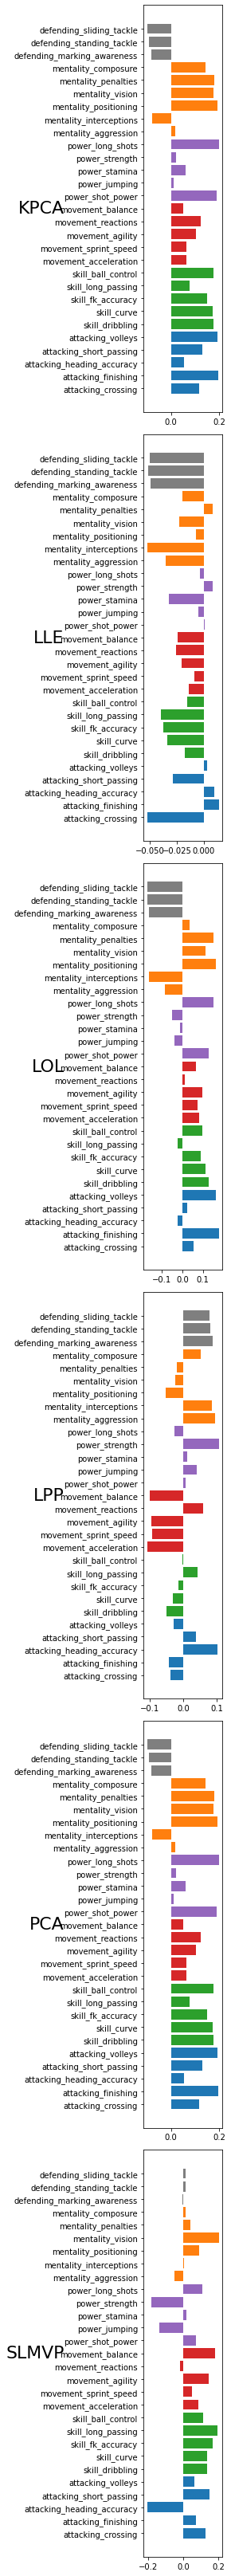

In [75]:
corrs_avg['skill_set'] = corrs_avg.index.to_series().str.split("_").str[0]
colors = corrs_avg['skill_set'].map(
    {'attacking': '#1f77b4',
     'skill': '#2ca02c',
     'movement' : '#d62728',
     'power' : '#9467bd',
     'mentality' : '#ff7f0e',
     'defending' : '#7f7f7f'})

corrs_avg.drop(columns=['skill_set'], inplace=True)

n_rows = 6
n_cols = 1

fig, ax = plt.subplots(
    n_rows, n_cols, figsize=(12, 45), sharey='row')

# Plot

for idx, key_dim in enumerate(list(corrs_avg.keys())):
    values = corrs_avg[key_dim]#.sort_values(ascending=True)
    categories = values.index
    ax[idx].barh(categories, values, color=colors)
    #ax[floor(idx/n_cols)][idx % n_cols].set_title(key_dim)

# Add row lables
row_labels = corrs_avg.keys().to_list()
# Iterate over each subplot and add annotation
for i, ax_ in enumerate(ax):
    # Add annotation to the left of the subplot
    ax_.annotate(row_labels[i], xy=(0, 0.5), xytext=(-1, 0.5), fontsize=22,
                ha='right', va='center', textcoords='axes fraction')
    
plt.tight_layout()

plt.show()

In [55]:
row_labels

['KPCA', 'LLE', 'LOL', 'LPP', 'PCA', 'SLMVP']

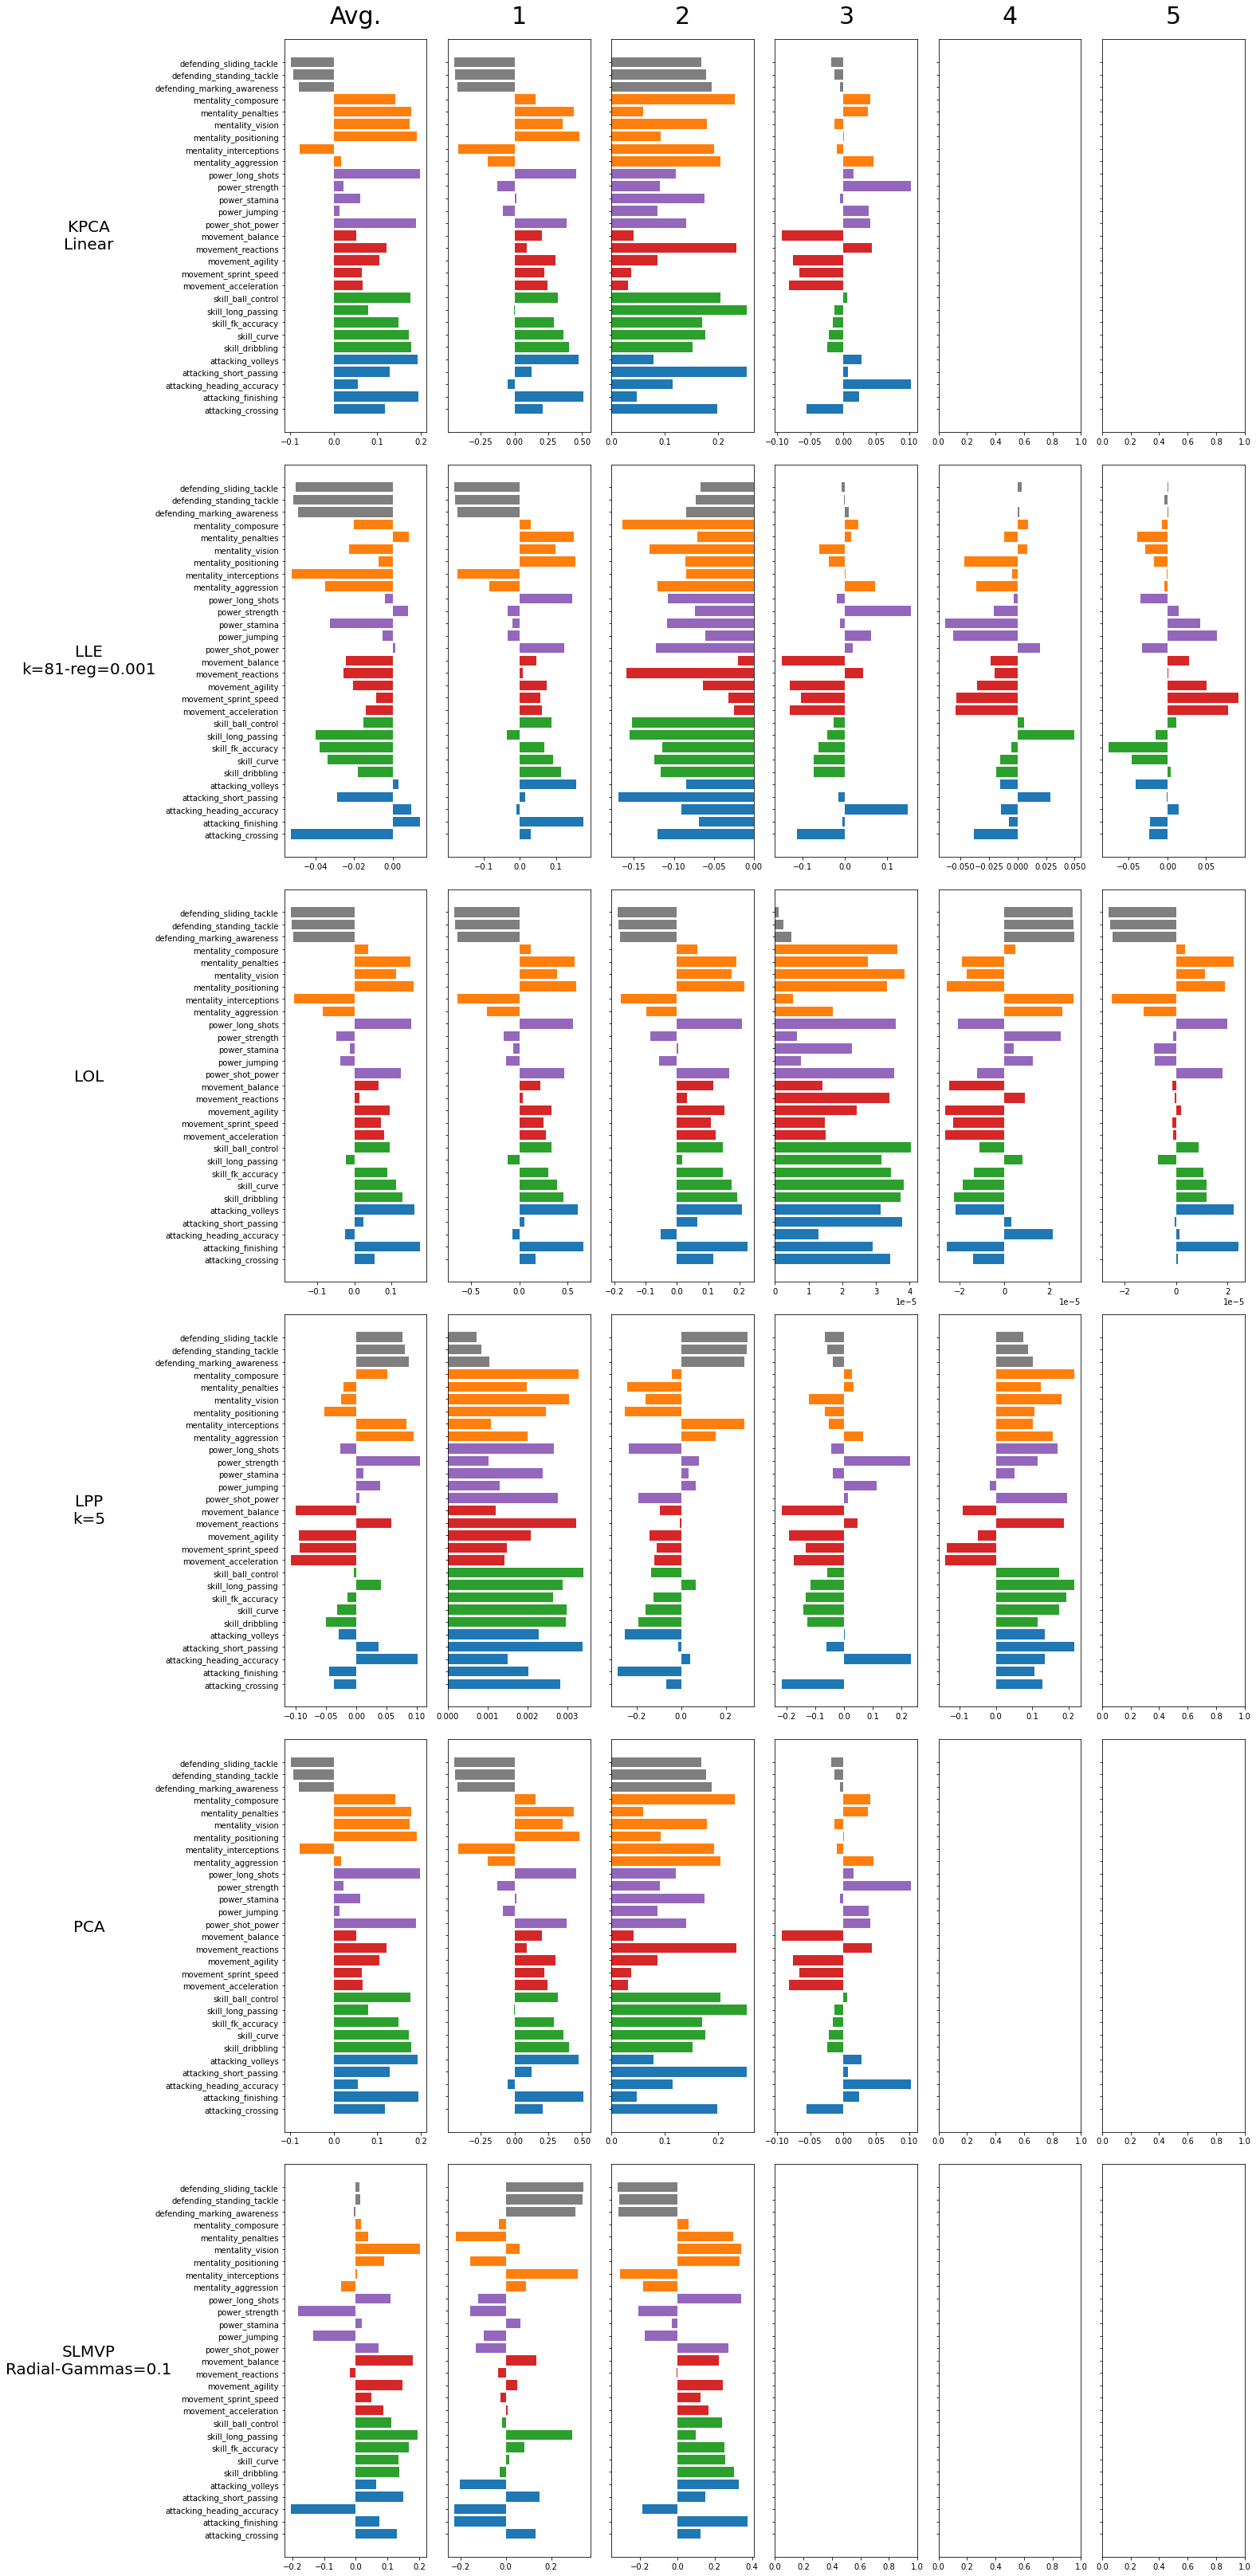

In [84]:
corrs['skill_set'] = corrs.index.to_series().str.split("_").str[0]
colors = corrs['skill_set'].map(
    {'attacking': '#1f77b4',
     'skill': '#2ca02c',
     'movement' : '#d62728',
     'power' : '#9467bd',
     'mentality' : '#ff7f0e',
     'defending' : '#7f7f7f'})

corrs.drop(columns=['skill_set'], inplace=True)

n_rows = 6
n_cols = 6

fig, ax = plt.subplots(
    n_rows, n_cols, figsize=(22, 45), sharey='row')

# Plot
pos = -1
for idx, key_dim in enumerate(list(corrs.keys())):
    values = corrs[key_dim]#.sort_values(ascending=True)
    categories = values.index
    if key_dim[-1] == 0:
        pos += 1
    ax[pos][key_dim[-1]+1].barh(categories, values, color=colors)
    #ax[floor(idx/n_cols)][idx % n_cols].set_title(key_dim)

# Plot avgs
for idx, key_dim in enumerate(list(corrs_avg.keys())):
    values = corrs_avg[key_dim]#.sort_values(ascending=True)
    categories = values.index
    ax[idx][0].barh(categories, values, color=colors)
    
# Add column labels
col_labels = ['Avg.', '1', '2', '3', '4', '5']
for ax_, col in zip(ax[0], col_labels):
    ax_.annotate(col, xy=(0.5, 1), xytext=(0, 20),
                xycoords='axes fraction', textcoords='offset points',
                size=30, ha='center', va='baseline')

# Add row lables
row_labels = [x[1] + '\n' + x[2] for x in corrs.keys().to_list()]
row_labels = [x for i, x in enumerate(row_labels) if x not in row_labels[:i]]
for ax_, row in zip(ax[:,0], row_labels):
    ax_.annotate(row, xy=(0, 0.5), xytext=(-ax_.yaxis.labelpad - 75, 0),
                xycoords=ax_.yaxis.label, textcoords='offset points',
                size=20, ha='center', va='center')

    
plt.subplots_adjust(hspace=0.0)  # Adjusting spacing between subplots

plt.tight_layout()
plt.show()

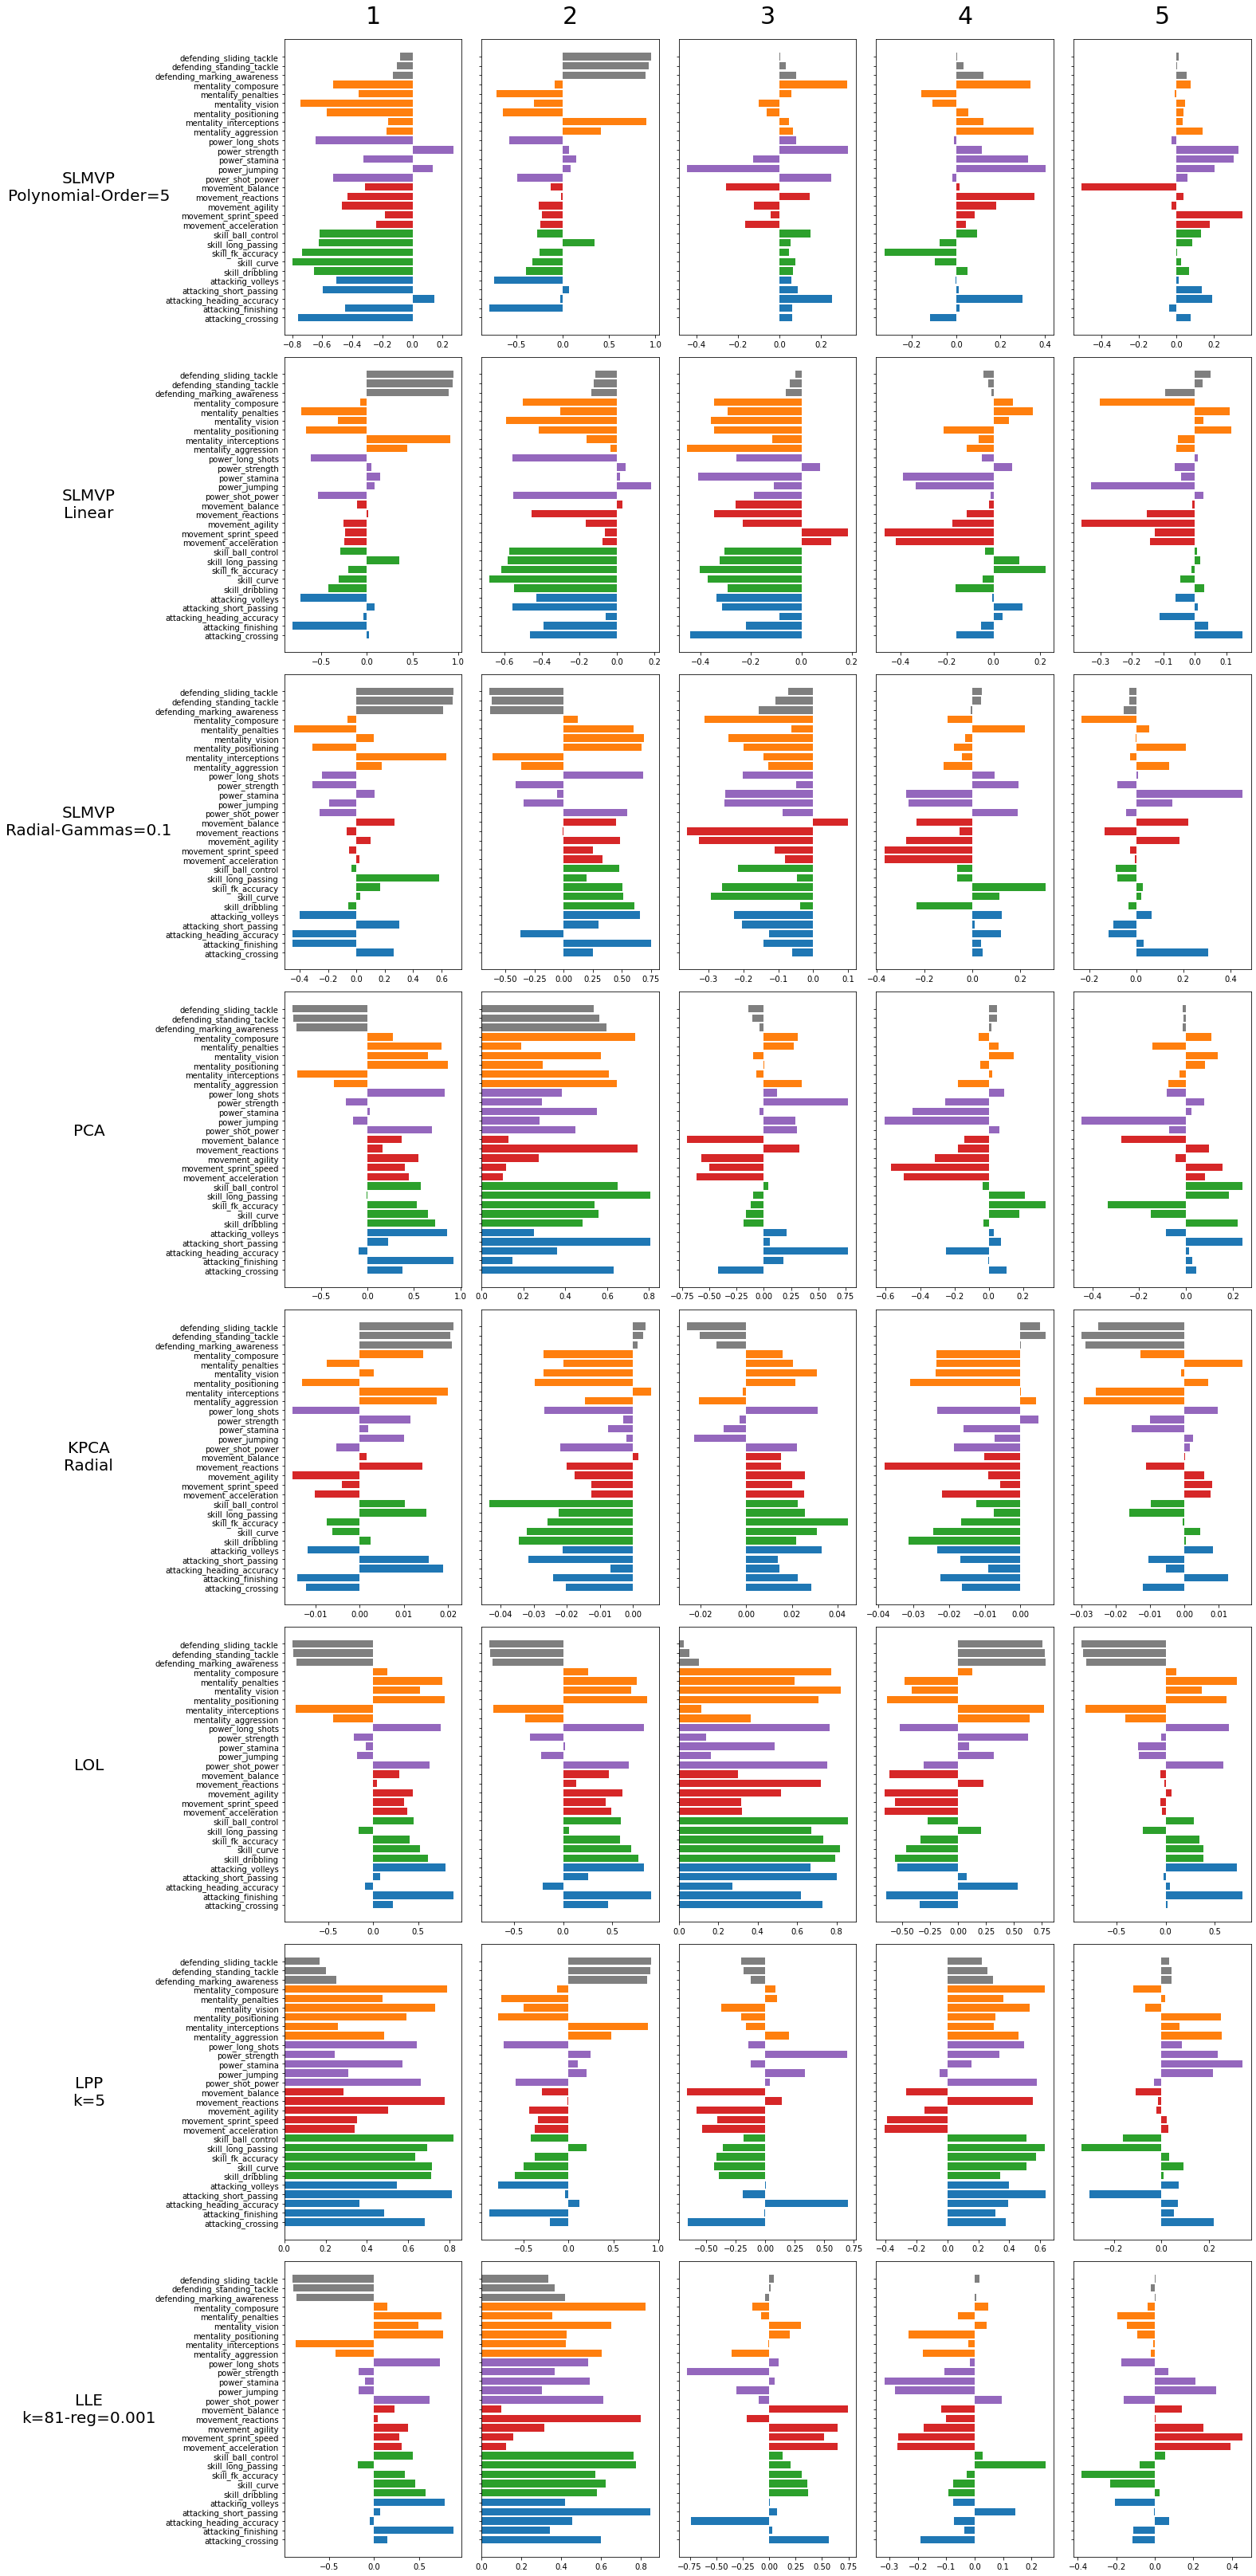

In [74]:
corrs['skill_set'] = corrs.index.to_series().str.split("_").str[0]
colors = corrs['skill_set'].map(
    {'attacking': '#1f77b4',
     'skill': '#2ca02c',
     'movement' : '#d62728',
     'power' : '#9467bd',
     'mentality' : '#ff7f0e',
     'defending' : '#7f7f7f'})

corrs.drop(columns=['skill_set'], inplace=True)

n_rows = 8
n_cols = 5

fig, ax = plt.subplots(
    n_rows, n_cols, figsize=(22, 45), sharey='row')

# Plot
for idx, key_dim in enumerate(list(corrs.keys())):
    values = corrs[key_dim]#.sort_values(ascending=True)
    categories = values.index
    ax[floor(idx/n_cols)][idx % n_cols].barh(categories, values, color=colors)
    #ax[floor(idx/n_cols)][idx % n_cols].set_title(key_dim)
    
# Add column labels
col_labels = ['1', '2', '3', '4', '5']
for ax_, col in zip(ax[0], col_labels):
    ax_.annotate(col, xy=(0.5, 1), xytext=(0, 20),
                xycoords='axes fraction', textcoords='offset points',
                size=30, ha='center', va='baseline')

# Add row lables
row_labels = [x[1] + '\n' + x[2] for x in corrs.keys().to_list()]
row_labels = [x for i, x in enumerate(row_labels) if x not in row_labels[:i]]
for ax_, row in zip(ax[:,0], row_labels):
    ax_.annotate(row, xy=(0, 0.5), xytext=(-ax_.yaxis.labelpad - 75, 0),
                xycoords=ax_.yaxis.label, textcoords='offset points',
                size=20, ha='center', va='center')

    
plt.subplots_adjust(hspace=0.0)  # Adjusting spacing between subplots

plt.tight_layout()
plt.show()